## 作業

設計錢包總金額為 1000 元，

如果購買商品總金額超過 1000 

會引發一個金額不足的例外 ValueError

In [3]:
sum=0
dic1 = {}
while True:
    item = input("消費項目")
    price = input("消費金額")   
    try:
        if  sum+ int(price) > 1000:
            raise ValueError
        dic1[item] = price            
        sum+=int(price)   
    except ValueError:
        print('已經超支了')
        print(dic1)
        break   

消費項目A
消費金額500
消費項目B
消費金額600


ValueError: 已經超支了

In [7]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __str__(self):
        return f"({self.x},{self.y})"
p1 = Point(2,3)
print(p1)

(2,3)


``` python
__add__  +

__iadd__  +=

__sub__  -

__isub__  -=

__mul__  *

__imul__  *=

__truediv__   /

__itruediv__   /=

__floordiv__  //

__ifloordiv__  //=

__mod__  %

__imod__  %=

__pow__  **

__ipow__  **=
```

In [10]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __add__(self,other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x,y)
    def __str__(self):
        return f"({self.x},{self.y})"
p1 = Point(2,3)
p2 = Point(-1,2)
print(p1 + p2)

(1,5)


In [23]:
class Student:
    def __init__(self,name,score):
        self.name = name
        self.score = score
    #小於    
    def __lt__(self,other):    
        return self.score < other.score
    #比大於__gt__ 等於__eq__
    def __str__(self):
        return f"{self.name}:{self.score}"
st1 = Student("Ken",75)
st2 = Student("Vivin",86)
st3 = Student("Iris",65)
stList = [st1,st2,st3]
print(st1)
print(st2)
print(st1 > st2)
stList.sort()
for st in stList:
    print(st)

Ken:75
Vivin:86
False
Iris:65
Ken:75
Vivin:86


## 目錄管理

我們可以使用 os 模組的 getcwd() 方法獲取當前工作目錄。

此方法以字串形式返回當前工作目錄。 

請動手操作，並留意輸出結果

In [24]:
import os
print(os.getcwd())

C:\Users\xvpow\aipython20231028\ch7


## 切換目錄(不需要練習)


In [28]:
import os
print(os.getcwd())
os.chdir("./test")
print(os.getcwd())


C:\Users\xvpow\aipython20231028\ch7\test


FileNotFoundError: [WinError 2] 系統找不到指定的檔案。: './test'

In [31]:
import os
print(os.getcwd())
print(os.listdir())#目前工作環境下有什麼內容

C:\Users\xvpow\aipython20231028\ch7
['.ipynb_checkpoints', 'ch7.ipynb', 'data.json', 'data.txt', 'data0.json', 'data1.txt', 'example.csv', 'example1.csv', 'example2.csv', 'json與csv用檔案.zip', 'result-readline.txt', 'score.json', 'score.txt', 'test', 'ttest.csv']


In [33]:
import os
from os.path import isfile,isdir
print(os.getcwd())
dirList = os.listdir()
for f in dirList:
    if isfile(f):
        print("檔案:",f)
    elif isdir(f):
        print("目錄:",f)

C:\Users\xvpow\aipython20231028\ch7
目錄: .ipynb_checkpoints
檔案: ch7.ipynb
檔案: data.json
檔案: data.txt
檔案: data0.json
檔案: data1.txt
檔案: example.csv
檔案: example1.csv
檔案: example2.csv
檔案: json與csv用檔案.zip
檔案: result-readline.txt
檔案: score.json
檔案: score.txt
目錄: test
檔案: ttest.csv


In [35]:
import os
from os import walk
print(os.getcwd())
mypath = "." #當前的路徑
for root,dirs,files in walk(mypath):
    print("root:",root)
    print("dirs:",dirs)
    print("files:",files)

C:\Users\xvpow\aipython20231028\ch7
root: .
dirs: ['.ipynb_checkpoints', 'test']
files: ['ch7.ipynb', 'data.json', 'data.txt', 'data0.json', 'data1.txt', 'example.csv', 'example1.csv', 'example2.csv', 'json與csv用檔案.zip', 'result-readline.txt', 'score.json', 'score.txt', 'ttest.csv']
root: .\.ipynb_checkpoints
dirs: []
files: ['ch7-checkpoint.ipynb']
root: .\test
dirs: []
files: ['test_1.txt', 'test_2.txt']


In [41]:
import os
if  not os.path.exists("mydir1"):
    os.mkdir("mydir1")
else:
    print("已存在")

已存在


## 檔案存取

file object = open(file_name [, access_mode])

UTF8 編碼資料還請加入另一個參數才可避免亂碼：encoding=‘utf-8'
file object = open(file_name [, access_mode])

參數說明

file_name：file_name 參數是一個字串資料，代表包含要連結的文件名稱。

access_mode：access_mode 確定文件必須打開的模式，包括讀取、寫入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為讀取(r)。

|模式	|可做操作|若檔案不存在|是否覆蓋|
|----|--------|-----------|-------|
|r	|只能讀|報錯	|-|
|r+	|可讀可寫|報錯|是|
|w	|只能寫|建立|是|
|w+ |可讀可寫|建立|是|
|a　|只能寫|建立|否，追加寫|
|a+	|可讀可寫|建立|否，追加寫|


In [43]:
text = """python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
"""
print(text,file=open("data.txt","w",encoding="utf-8"))

In [49]:
text = """python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
"""
fileObj = open("data2.txt","w",encoding="utf-8")
fileObj.write(text)
fileObj.close()

In [51]:
dataList = []
while True:
    msg = input("請輸入訊息(quit離開)")
    if msg == "quit":
        break
    dataList.append(msg)
file = open("msg.txt","w",encoding="utf-8")
msgTxt = "\n".join(dataList)
file.write(msgTxt)
file.close()

請輸入訊息(quit離開)A
請輸入訊息(quit離開)B
請輸入訊息(quit離開)C
請輸入訊息(quit離開)D
請輸入訊息(quit離開)E
請輸入訊息(quit離開)quit


In [52]:
f = open("data.txt","r",encoding="utf-8")
content = f.read()
print(content)
f.close()

python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。




## CSV
+ CSV 格式是資料庫最常用的導入和導出格式。
+ 資料均沒有類型，一切都是字串。
+ 沒有字體或顏色與儲存格寬度高度的設置。
+ Python 語法必須加入 import csv。
+ 讀取儲存格資料：
  + reader( )：依照每一列的編號 由0開始
  + DictReader( )
    + 以第一列的值為每一行的名稱，第一列不是資料
    + 也可以重新命名，但第一列必須是資料

### Read

In [54]:
import csv
f = open("example1.csv","r")
for row in csv.reader(f):
    if  float(row[5]) > 100:
        print(row[0],row[1],row[2],sep="#")

 104/01/03#2,640,781,030#64,138,886,194
 104/01/17#3,720,277,205#101,133,309,290
 104/01/30#4,540,373,544#143,900,658,474
 104/01/31#5,486,734,180#162,361,181,834


In [55]:
import csv
f = open("example.csv","r",encoding="utf-8")
for row in csv.DictReader(f):
    print(row["日期"],row["成交股數"])

 104/01/02 2,104,640,545
 104/01/03 2,640,781,030
 104/01/04 2,983,756,821
 104/01/05 3,062,757,248
 104/01/06 3,314,147,435
 104/01/09 2,610,433,477
 104/01/10 3,595,611,551
 104/01/11 3,322,390,467
 104/01/12 2,969,248,375
 104/01/13 3,497,838,901
 104/01/16 3,184,795,667
 104/01/17 3,720,277,205
 104/01/18 4,088,756,925
 104/01/30 4,540,373,544
 104/01/31 5,486,734,180


In [59]:
import csv
f = open("example1.csv","r")
csvData = csv.reader(f)
print(type(csvData))
csvList = list(csvData)
print(csvList)

<class '_csv.reader'>
[[' 104/01/02', '2,104,640,545', '50,472,201,894', '497,889', '6,952.21', '-119.87'], [' 104/01/03', '2,640,781,030', '64,138,886,194', '623,192', '7,053.38', '101.17'], [' 104/01/04', '2,983,756,821', '75,845,629,353', '728,417', '7,082.97', '29.59'], [' 104/01/05', '3,062,757,248', '76,850,752,698', '737,780', '7,130.86', '47.89'], [' 104/01/06', '3,314,147,435', '88,101,921,548', '823,810', '7,120.51', '-10.35'], [' 104/01/09', '2,610,433,477', '71,323,370,369', '634,137', '7,093.04', '-27.47'], [' 104/01/10', '3,595,611,551', '97,168,542,017', '869,327', '7,178.87', '85.83'], [' 104/01/11', '3,322,390,467', '88,786,671,892', '802,539', '7,188.21', '9.34'], [' 104/01/12', '2,969,248,375', '78,947,910,460', '731,328', '7,186.58', '-1.63'], [' 104/01/13', '3,497,838,901', '99,286,437,370', '819,762', '7,181.54', '-5.04'], [' 104/01/16', '3,184,795,667', '76,842,611,338', '719,725', '7,103.62', '-77.92'], [' 104/01/17', '3,720,277,205', '101,133,309,290', '899,597

## Json
以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容

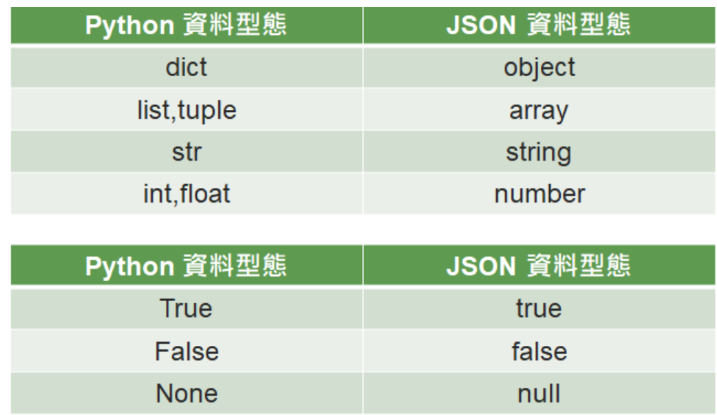

In [63]:
import json
json1 = {'python':'課程',"gjun":100,"python-class":True,"Line":None}
print(json1)
print(type(json1))
jsonStr = json.dumps(json1,ensure_ascii=False)
print(jsonStr)

{'python': '課程', 'gjun': 100, 'python-class': True, 'Line': None}
<class 'dict'>
{"python": "課程", "gjun": 100, "python-class": true, "Line": null}


In [64]:
import json
json1 = {'python':'課程',"gjun":100,"python-class":True,"Line":None}
print(json1)
print(type(json1))

with open("data0.json","w",encoding="utf-8") as outfile:
     json.dump(json1,outfile,ensure_ascii=False)

{'python': '課程', 'gjun': 100, 'python-class': True, 'Line': None}
<class 'dict'>


In [70]:
import json
data = { }
data['people'] = [ ]
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
##轉為一個data.json的檔案
with open("data.json","w",encoding="utf-8") as outfile:
    json.dump(data,outfile,ensure_ascii=False,indent=2)

### Json 轉為 Python物件
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。

In [68]:
import json
json1 = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
json2 = json.loads(json1)
print(json2)
print(type(json2))
print(json2["gjun"])

{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}
<class 'dict'>
100


In [71]:
import json
with open("data.json","r",encoding="utf-8") as jsonFile:
    data = json.load(jsonFile)
    for k in data:
        print(f"{k}-{data[k]}")

people-[{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}]


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [73]:
import os
class TestFile:
     def openFile(self,filePath):   
            self.handle = open(filePath,"w")
            #self.handle.close()
t = TestFile()
t.openFile("data0.json")
os.remove("data0.json")
print("Success");

PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'data0.json'

## With 方式操作檔案
+ 多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
+ 以 with 方式操作檔案：
  + 檔案存取仍有可能產生 IO 例外。
  + 離開 with 區塊時檔案將會自動進行 close( ) 動作，自動關閉檔案。

In [74]:
import os
class TestFile:
     def openFile(self,filePath):   
            with open(filePath,"w") as f:
                f.write("Hello")
t = TestFile()
t.openFile("text.txt")
os.remove("text.txt")
print("Success")         

Success


## 壓縮與解壓縮 測試資料

In [75]:
import shutil
import os
try:
    os.mkdir('test2')
    print('建立目錄')
except:
    print('建立目錄失敗')

with open('./test2/test2.txt', 'a') as file2:
    file2.write('Programming is Fun.')
    print('完成附加檔案')
    
with open('./test2/test3.txt', 'a') as file2:
    file2.write('Programiz for beginners')
    print('完成附加檔案')
    
print('查看目錄內容')
os.listdir('./test2')

建立目錄
完成附加檔案
完成附加檔案
查看目錄內容


['test2.txt', 'test3.txt']

## 壓縮與解壓縮
### 但可以於Python程式內運用，可實現以下功能：
#### 建立zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的write()動作將資料夾壓縮。
#### 解壓縮zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的extractall()動作解壓縮。
#### 列出zip壓縮檔案內容
+透過zipfile.ZipFile( )建立物件，再透過物件的namelist()動作查看。

In [78]:
import zipfile

def create_zip(path):
    zf = zipfile.ZipFile(f'{path}.zip', 'w', zipfile.ZIP_DEFLATED)
    for root, dirs, files in os.walk(path):
        for file_name in files:
            zf.write(os.path.join(root, file_name))
    
def ziplist(file_path):
    zf = zipfile.ZipFile(file_path, 'r')
    print(zf.namelist())
    
def extra_zip(file_path):
    zf = zipfile.ZipFile(file_path, 'r')
    zf.extractall()

try:
    print('壓縮資料')
    create_zip('test2')
except:
    print('壓縮失敗')
    

try:
    print('查看壓縮資料')
    ziplist('test2.zip')
except:
    print('查看壓縮資料失敗')    
    
    
 

壓縮資料
查看壓縮資料
['test2/test2.txt', 'test2/test3.txt']
解壓縮資料


In [79]:
import shutil
try:
    print('刪除目錄')
    shutil.rmtree("test2")
except:
    print('刪除目錄失敗')


try:
    print('解壓縮資料')
    extra_zip('test2.zip')
except:
    print('解壓縮失敗')   

刪除目錄
解壓縮資料
